# 多层感知机

In [120]:
%matplotlib widget
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l
from IPython.core.interactiveshell import InteractiveShell
from tensorflow.keras.datasets import fashion_mnist
from torch.utils import data
from torchvision import transforms
import torch.nn as nn

InteractiveShell.ast_node_interactivity = "all"

d2l.plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
d2l.plt.rcParams['axes.unicode_minus'] = False  # 显示负号

## 激活函数

### ReLU 函数

$$ReLU(x) = max(x,0)$$

RuLU 函数的图像

<Figure size 400x200 with 0 Axes>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
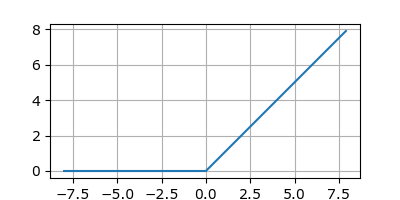

In [87]:
x = torch.arange(-8, 8, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plt.figure(figsize=(4, 2))
d2l.plot(x.detach(), y.detach())

RuLU 函数导数的图像

<Figure size 400x200 with 0 Axes>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
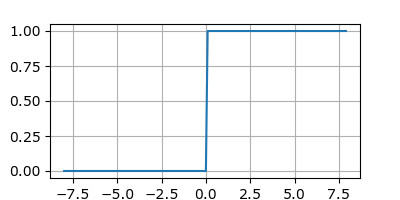

In [88]:
if x.grad != None:
    _ = x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plt.figure(figsize=(4, 2))
d2l.plot(x.detach(), x.grad)

### sigmoid函数

$$sigmoid(x)= \frac{1}{1+e^{-x}}$$

sigmoid函数的图像

<Figure size 400x200 with 0 Axes>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
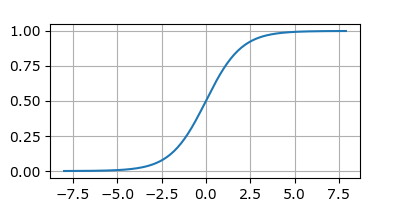

In [94]:
x = torch.arange(-8, 8, 0.1, requires_grad=True)
y = torch.sigmoid(x)
d2l.plt.figure(figsize=(4, 2))
d2l.plot(x.detach(), y.detach())

 sigmoid函数导数的图像

<Figure size 400x200 with 0 Axes>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
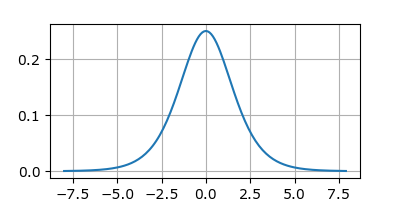

In [95]:
if x.grad != None:
    _ = x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plt.figure(figsize=(4, 2))
d2l.plot(x.detach(), x.grad)

### tanh 函数

tanh 函数的图像

<Figure size 400x200 with 0 Axes>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
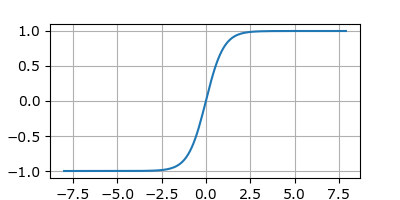

In [96]:
x = torch.arange(-8, 8, 0.1, requires_grad=True)
y = torch.tanh(x)
d2l.plt.figure(figsize=(4, 2))
d2l.plot(x.detach(), y.detach())

tanh 函数导数的图像

<Figure size 400x200 with 0 Axes>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
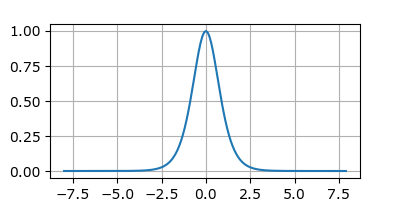

In [109]:
if x.grad != None:
    _ = x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plt.figure(figsize=(4, 2))
d2l.plot(x.detach(), x.grad)

## MNIST图像分类数据集

### 数据集准备

In [116]:
d2l.use_svg_display()
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="data", train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root="data", train=False, transform=trans, download=True
)

print("train size:", len(mnist_train))
print("test size:", len(mnist_test))
print("image size:", mnist_train[0][0].shape)

train size: 60000
test size: 10000
image size: torch.Size([1, 28, 28])


In [117]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
labels_index = range(0, 10)
labels_en = np.array(d2l.get_fashion_mnist_labels(labels_index))
labels_zh = ['T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴']

labels = np.insert(labels_en.reshape(10, 1), 0, values=labels_index, axis=1)
labels = np.insert(labels, 2, values=labels_zh, axis=1)
labels[:, 2]

array(['T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴'],
      dtype='<U10')

可视化前18张图片。

In [118]:
def get_fashion_mnist_labels_zh(labels):
    """返回 Fashion-MNIST 数据集的中文标签"""
    text_labels = ['T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴']
    return [text_labels[int(i)] for i in labels]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
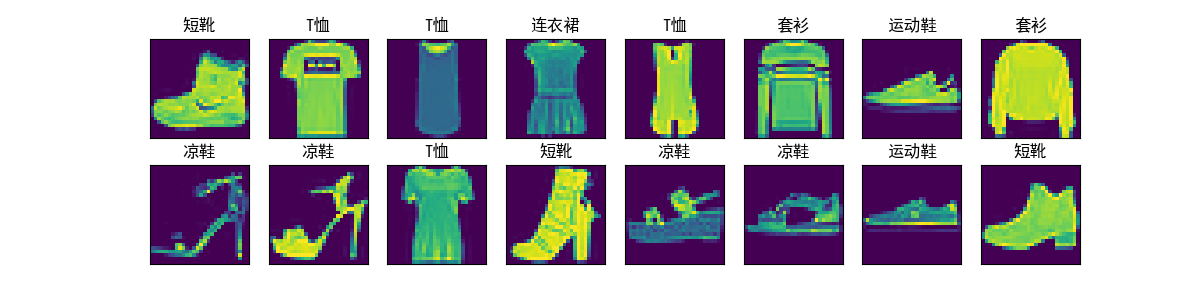

In [122]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))


d2l.show_images(
    imgs=X.reshape(18, 28, 28),
    num_rows=2,
    num_cols=8,
    titles=get_fashion_mnist_labels_zh(y),
    scale=1.5,
);

设置批量大小，并生成训练集和测试集

In [123]:
batch_size = 256

# 在Windows下需要设置num_workers=0 （默认状态）
train_iter = data.DataLoader(
    mnist_train, batch_size, shuffle=True)
test_iter = data.DataLoader(
    mnist_train, batch_size, shuffle=False)

## MPL实现1: 不使用高级API

## MPL实现2: 使用高级API

In [146]:
net = torch.nn.Sequential(torch.nn.Flatten(),
                          torch.nn.Linear(784,256),
                          torch.nn.ReLU(),
                          torch.nn.Linear(256,10))

# 根据网络层的不同定义不同的初始化方式     
def weight_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight,0.01)
        
# _ = net.apply(weight_init)

In [147]:
batch_size = 256
learning_rate = 0.1
num_epochs = 10

loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr=learning_rate)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
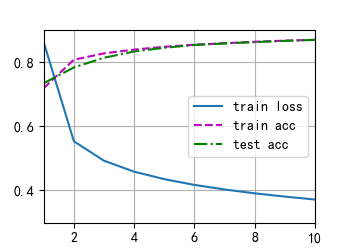

In [148]:
d2l.train_ch3(net,test_iter,test_iter,loss,num_epochs,trainer)

In [130]:
def get_fashion_mnist_labels_zh(labels):
    """返回 Fashion-MNIST 数据集的中文标签"""
    text_labels = ['T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴']
    return [text_labels[int(i)] for i in labels]

array([<AxesSubplot:title={'center':'短靴->短靴'}>,
       <AxesSubplot:title={'center':'T恤->T恤'}>,
       <AxesSubplot:title={'center':'T恤->T恤'}>,
       <AxesSubplot:title={'center':'连衣裙->T恤'}>,
       <AxesSubplot:title={'center':'T恤->连衣裙'}>,
       <AxesSubplot:title={'center':'套衫->套衫'}>], dtype=object)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
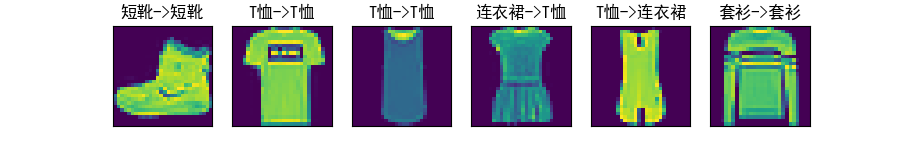

In [152]:
test_iter = data.DataLoader(mnist_train, batch_size, shuffle=False)

n = 6
for X, y in test_iter:
    trues = get_fashion_mnist_labels_zh(y)
    preds = get_fashion_mnist_labels_zh(torch.argmax(net(X), axis=1))
    titles = [true +'->' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])
    break


In [141]:
n

Signature: d2l.predict_ch3(net, test_iter, n=6)
Source:   
def predict_ch3(net, test_iter, n=6):
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(d2l.argmax(net(X), axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(d2l.reshape(X[0:n], (n, 28, 28)), 1, n,
                    titles=titles[0:n])
File:      c:\users\lenovo\appdata\roaming\python\python38\site-packages\d2l\torch.py
Type:      function


In [151]:
torch.argmax??

Docstring:
argmax(input) -> LongTensor

Returns the indices of the maximum value of all elements in the :attr:`input` tensor.

This is the second value returned by :meth:`torch.max`. See its
documentation for the exact semantics of this method.

.. note:: If there are multiple maximal values then the indices of the first maximal value are returned.

Args:
    input (Tensor): the input tensor.

Example::

    >>> a = torch.randn(4, 4)
    >>> a
    tensor([[ 1.3398,  0.2663, -0.2686,  0.2450],
            [-0.7401, -0.8805, -0.3402, -1.1936],
            [ 0.4907, -1.3948, -1.0691, -0.3132],
            [-1.6092,  0.5419, -0.2993,  0.3195]])
    >>> torch.argmax(a)
    tensor(0)

.. function:: argmax(input, dim, keepdim=False) -> LongTensor
   :noindex:

Returns the indices of the maximum values of a tensor across a dimension.

This is the second value returned by :meth:`torch.max`. See its
documentation for the exact semantics of this method.

Args:
    input (Tensor): the input tensor

## 欠拟合和过拟合

### 正则化

正则化是用于对抗过拟合的技术

In [1]:
!nvidia-smi

Thu Nov 18 21:37:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.55       Driver Version: 471.55       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 77%   77C    P2   149W / 170W |   5089MiB /  6144MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-smi

Sun Nov 14 13:27:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.55       Driver Version: 471.55       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 76%   76C    P2   148W / 170W |   5065MiB /  6144MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------